# Support Ticket Categorization
_Prompt Engineering & Generative AI_

__Joseph Reves joe.reves@gmail.com__

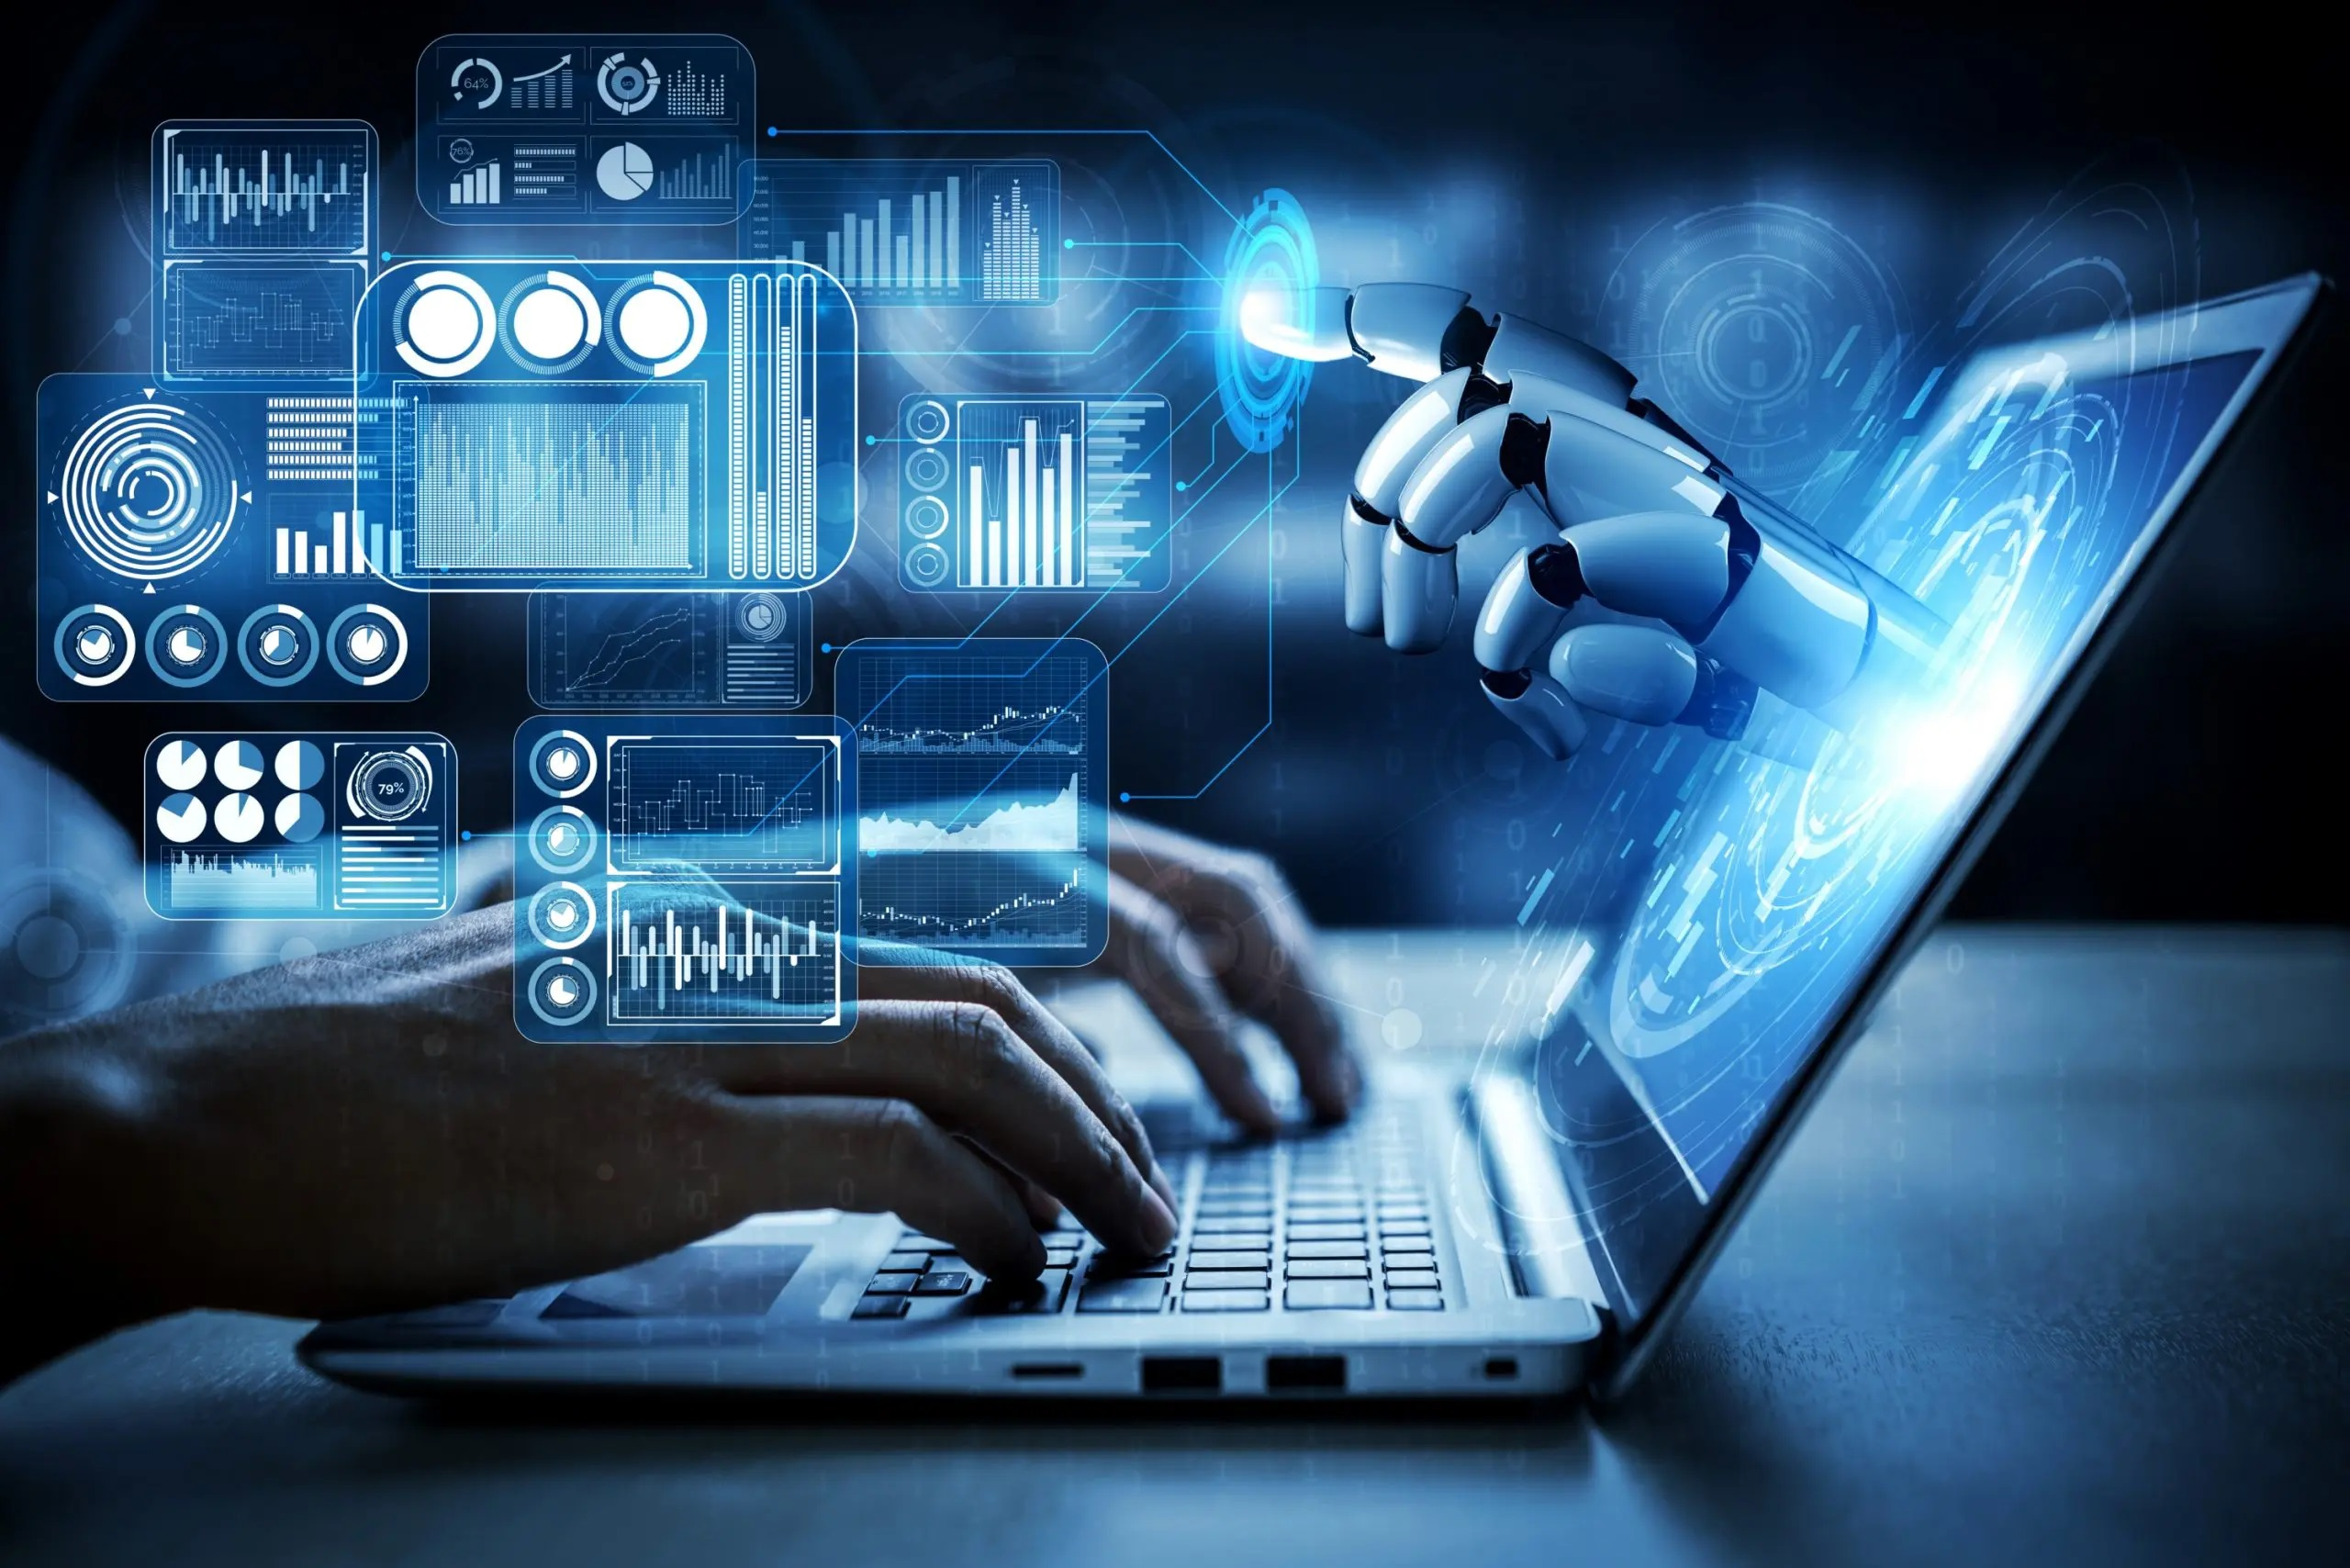

## Context and Objectives

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - done in the modern day using Large Language Models and Generative AI.

__Objectives__

Develop a Generative AI application using a Large Language Model to automate the classification and processing of support tickets. The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured Dataframe.

__Criteria__

Note: See the scoring rubric for the precise methodology you must employ to complete this assignment.

* __Model Building__
  * Import the 'hf_hub_download' function from the 'huggingface_hub' library and import the 'Llama' class from the 'llama_cpp' library.
  * Define the model name or path as a string 
  * Define the model basename as a string, indicating it's in the gguf format
  * Download the model from the Hugging Face Hub using the 'hf_hub_download' function by specifying the 'repo_id' and 'filename'
  * Create an instance of the 'Llama' class with specified parameters
<br><br>
* __Create the System Message__
  * Define the System Message - The system message must start with a line defining the bot's identity
  * The next line in the system prompt must have a clear description of what the bot is expected to do according to the business objective
  * There are 5 structured fields expected in the output
    * Categories - (Technical issue, Hardware issue, Data Recovery)
    * Tags
    * Priority
    * Suggested ETA
    * Generated 1st Reply (Sentiment-Based)
<br><br>
* __Load the Dataset__
  * Create a new column in the DataFrame called 'llama_response' and populate it with responses generated
  * Apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
  * Assign the response to a new column called 'llama_response' in the DataFrame
<br><br>
* __Dataset Preparation__
  * Concatenate the original DataFrame 'data' with a new DataFrame 
  * Drop specific columns which are not needed from the DataFrame 'data' 
<br><br>
* __Observations and Insights__
  * Share your observations and insights from this exercise, and your recommendations

<br><br>
__Data Description__
* support_tick_id: Unique identifier for a support incident
* support_ticket_text: Text description of the reported issue



## **Expected Output**

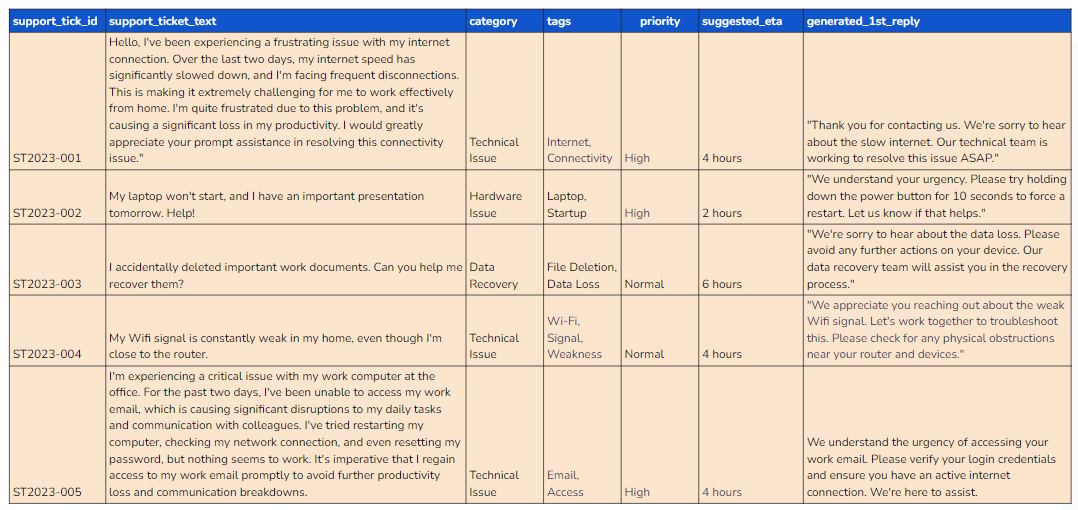

## Installing / Importing necessary libraries

In [1]:
# Installation for GPU llama-cpp-python
if 'google.colab' in str(get_ipython()):
    !CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q
else: 
    print("Executing locally")

Executing locally


In [2]:
# Install the hugging face hub
if 'google.colab' in str(get_ipython()):
    !pip install huggingface_hub -q
else: 
    print("Executing locally")

Executing locally


In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import json

# Timing for the queries
import time

# Data visualization
import matplotlib.pyplot as plt

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries for working with the LLM models
import huggingface_hub
from huggingface_hub import hf_hub_download

import llama_cpp
from llama_cpp import Llama

# Supress Warnings
import warnings

warnings.filterwarnings("ignore")

## **Model Loading**

<div class="alert alert-block alert-info">
<b>Dependency:</b> For this project, I plan to use an instance of llama running on my local machine with GPU processing on my AMD GPU enabled. My local GPU has 16GB of VRAM, comparable to the free tier of Colab. I've adapted the required code to detect and execute on Google Colab.
</div>

In [4]:
# This code detects the environment where we're running, and in the free version of Google Colab will distinguish between 
# a T4 GPU, a TPU, or CPU execution. It will populate the environment and GPU status accordingly, and warn if we're executing on a CPU
# In my local environment, it will use the AMD hipinfo utility to identify the available GPU. Easily adapted to CUDA, for nvidia

if 'google.colab' in str(get_ipython()):
    environment = "Google Colab"
    gpu_id = !nvidia-smi -L
    if "command not found" in str(gpu_id):
        gpu_id = "WARNING: GPU not configured"
else:
    environment = "Local execution"
    hipinfo = !hipinfo
    elements = hipinfo.n.split('\n')
    for line in elements:
        if 'Name:' in line:
            gpu_id = line.split('Name:', 1)[-1].strip()
            break

In [5]:
# Module versions, execution environment and GPU availability
print("Execution environment:",environment)
print("GPU Available:",gpu_id)
print("Llama version:", llama_cpp.__version__)
print("Huggingface Hub version:",huggingface_hub.__version__)

Execution environment: Local execution
GPU Available: AMD Radeon RX 6900 XT
Llama version: 0.2.20
Huggingface Hub version: 0.17.3


## Load the model from Huggingface, and define an instance of the Llama class

##### Objective: Write Python code that imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library, ensuring that the code is correctly formatted and ready for execution. (5 Marks)

In [6]:
# Import the 'hf_hub_download' function from the 'huggingface_hub' library
# See code blocks above

# Import the 'Llama' class from the 'llama_cpp' library

#########################
# See code blocks above #
#########################

In [7]:
# Define the model name or path as a string 
# Define the model basename as a string, indicating it's in the gguf format

model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"


In [8]:
# Download the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

In [9]:
# Create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path, # Specified above
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx
        n_gpu_layers=40,  # Optimal for local execution. Use -1 in Colab
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **Q2: Define the System Message** **(7 Marks)**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, you should perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



*What content and instructions should be included in the system message to guide the technical assistant when processing support tickets? Please provide a detailed description of the information and guidelines that the system message should contain.*

Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.
  - **Generating 1st Reply (Sentiment-Based):** Emphasize the importance of crafting a response that aligns with the sentiment expressed in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before responding.
  - **Tone:** Emphasize that the tone of all responses should be polite and professional.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

##### **The output of the model should be in JSON format**

In [11]:
def generate_llama_response(support_ticket_text):

    # System message
    system_message = """
    [INST]<<SYS>> You are producing JSON output as a guide for a corporate it support desk assistant. <</SYS>>

    Your input is the text of the ticket describing a customer's reason for contacting the support desk.
    You must examine the entire text of the input, and respond in a JSON format.

    Your primary task is to classify the ticket into one of three possible categories: Technical, Hardware, or Data Recovery. Return one of these categories;
    if you cannot determine the category, return "Technical" and add the tag "Unclassifiable"

    You should create one or more one-word tags that will help to further qualify the issue. 
    For every response, add a tag to the "tags" field for the sentiment, e.g. "Positive", "Negative", or "Neutral"

    You should classify the priority of the ticket as Low, Normal, or High. High priority tickets generally impact multiple users. 
    If you cannot determine the priority, return a priority of "Normal"


    You should return a estimated resolution time in whole numbers representing minutes, hours, or days. If you cannot estimate a resolution time, return "ASAP",
    and add the tag "ETA_Indefinite" to the "tags" field.

    Return a suggested first response to the customer, taking into account the sentiment expressed in the ticket text.
    The tone of the response should be polite and professional, acknowledging the issue and setting the customer's expectations for resolution.
    Recommend immediate actions the customer could perform to resolve the issue.
    For every response, add a tag to the "tags" field for the sentiment, e.g. "Positive", "Negative", or "Neutral"
        
    You must return JSON fields only, with the following identifiers:

    "category" for the category of the ticket. This must be one of "Technical", "Hardware", or "Data Recovery"
    "tags" for the one or more one word tags, separated by comma
    "priority" for the priority of the ticket
    "suggested_eta" for the estimated resolution time in elapsed minutes, hours or seconds
    "generated_1st_reply" for the text of the response to the customer. Be concise, and do not exceed 500 words.

    It is imperative that no other text be returned. Only these JSON fields. You must return all fields.

    If you can't recognize the input as ticket text, respond with ONLY JSON tokens as in this example:
        {  
        "category": "Technical",
        "tags": ["Unclassifiable","Neutral"],
        "priority": "Normal",
        "suggested_eta": "ASAP",
        "generated_1st_reply": "Thank you for reaching out to our support desk. We've received your ticket and will assist with resolving the issue as soon as possible. Please provide some additional details about the issue you're reporting"
    }

    Do not in any circumstance respond with anything other than the JSON identifiers described above. Specifically do not respond with any text containing, "Sure, I can help!"
    Do not respond with any query to "Please provide the text of the ticket"

    Respond only with JSON. No other text is permitted.
    
    [/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{support_ticket_text}\n{system_message}"

    start_time = time.perf_counter()  # Start timing
    
    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    end_time = time.perf_counter()  # End timing
    llama_time = round(end_time - start_time, 2)  # Calculate Llama query time
    # I'm returning the time required to complete each query against my local instance of Llama to use in my observations

    # Extract and return the response text
    response_text = response["choices"][0]["text"]  
    
    # I want to capture both the JSON response text, and the processing time to complete the query
    return {"response_text": response_text, "llama_time": llama_time}



### **Q3: Loading our Dataset (2 Marks)**

In [12]:
# Import the pandas library and alias it as 'pd'

#########################
# See code blocks above #
#########################

# Read a CSV file into a DataFrame and store it in the 'data' variable
# Load the Support Tickets data.  These are stored as a csv file on disk
data = pd.read_csv("Support_ticket_text.csv")
orig_tickets = data.copy()

- After reading the CSV file into the 'data' DataFrame, how can you determine the shape of the DataFrame, and what information does 'data.shape' provide?
- What does 'data.head()' do, and how can it be used to inspect the contents of the DataFrame?

In [13]:
# Quick look at a ticket data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [14]:
# what's the size and shape of the data?
print(
    "The available data includes",
    data.shape[0],
    "rows, with",
    data.shape[1],
    "columns of information",
)

The available data includes 21 rows, with 2 columns of information


In [15]:
# get a list of all our columns
columns = data.columns
print(columns)

Index(['support_tick_id', 'support_ticket_text'], dtype='object')


In [16]:
# how is the data currently typed by python?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [17]:
# summarize null values in the data
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

In [18]:
# describe the object colums
data.describe(include="object").T

,count,unique,top,freq
support_tick_id,21,21,ST2023-006,1
support_ticket_text,21,21,My internet connection has significantly slowe...,1


#### Testing

In [19]:
# NOTE: THIS IS A DUMMY FUNCTION I USED FOR TESTING
def generate_llama_dummy(support_ticket_text):
    print (support_ticket_text)
    response_text = """{  
        "category": "Technical",
        "tags": ["Unclassifiable"],
        "priority": "Normal",
        "suggested_eta": "ASAP",
        "generated_1st_reply": "Thank you for reaching out to our support desk. We've received your ticket and will assist with resolving the issue as soon as possible. Please provide some additional details about the issue you're reporting"
    }"""

    llama_time = 275.05
    return {"response_text": response_text, "llama_time": llama_time}

### **Q4: Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame ( 5Marks)**

In [20]:
# Apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
data['llama_response'] = data['support_ticket_text'].apply(lambda support_ticket_text: generate_llama_response(support_ticket_text))


# Extract 'llama_time' from the 'llama_response' and create a new column 'llama_time'
data['llama_time'] = data['llama_response'].apply(lambda query_time: query_time['llama_time'])


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [21]:
## Check the new_columns added
data.head()

,support_tick_id,support_ticket_text,llama_response,llama_time
0,ST2023-006,My internet connection has significantly slowe...,"{'response_text': ' { ""category""...",286.48
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{'response_text': ' { ""category""...",283.83
2,ST2023-008,I've accidentally deleted essential work docum...,"{'response_text': ' { ""category""...",268.52
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{'response_text': ' { ""category""...",380.50
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{'response_text': ' { ""category""...",306.17


In [22]:
# Here's an example response, including the JSON query response and the query time
data['llama_response'][0]

{'response_text': '\n    {  \n        "category": "Technical",\n        "tags": ["Connectivity_Issue","Negative"],\n        "priority": "Normal",\n        "suggested_eta": "24 hours",\n        "generated_1st_reply": "Thank you for reaching out to our support desk. We\'ve received your ticket and will assist with resolving the connectivity issue as soon as possible. Please provide some additional details about the issue you\'re reporting, such as any error messages or the make and model of your internet service provider."\n    }',
 'llama_time': 286.48}

### **Q5: Prepare the dataset in the desired format** **(6 Marks)**

- Run the code specified in the cells

In [23]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [24]:
# Apply the function to the 'llama_response' column
# data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)

# We can just cut to the chase, and parse these into the appropriate columns

# Access keys within 'response_text' in the 'llama_response' column
data['category'] = data['llama_response'].apply(lambda x: json.loads(x['response_text']).get('category', ''))
data['tags'] = data['llama_response'].apply(lambda x: json.loads(x['response_text']).get('tags', []))
data['priority'] = data['llama_response'].apply(lambda x: json.loads(x['response_text']).get('priority', ''))
data['suggested_eta'] = data['llama_response'].apply(lambda x: json.loads(x['response_text']).get('suggested_eta', ''))
data['generated_1st_reply'] = data['llama_response'].apply(lambda x: json.loads(x['response_text']).get('generated_1st_reply', ''))

In [25]:
# Here's the intermediate result, with the JSON response, the timing metric, and the remaining columns already populated
data.sample(10)

,support_tick_id,support_ticket_text,llama_response,llama_time,category,tags,priority,suggested_eta,generated_1st_reply
20,ST2023-026,I hope this message finds you well. I am writi...,"{'response_text': ' { ""category""...",248.12,Technical,"[Unclassifiable, Neutral]",Normal,ASAP,Thank you for reaching out to our support desk...
19,ST2023-025,I am experiencing a critical problem with my i...,"{'response_text': ' { ""category""...",277.91,Technical,"[Network_Issues, Positive]",Normal,24hrs,Thank you for reaching out to our support desk...
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{'response_text': ' { ""category""...",282.16,Hardware,"[Gaming Laptop, Graphics Card]",Normal,24 hours,Thank you for reaching out to our support desk...
17,ST2023-023,I accidentally formatted my USB drive with cru...,"{'response_text': ' { ""category""...",286.29,Data Recovery,"[USB_Drive, File_Recovery]",Normal,24 hours,Thank you for reaching out to our support desk...
11,ST2023-017,"My computer's screen has gone black, and I can...","{'response_text': ' { ""category""...",284.88,Technical,"[Hardware, Positive]",Normal,24 hours,Thank you for reaching out to our support desk...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{'response_text': ' { ""category""...",306.17,Technical,"[Battery_Issue, Negative]",Normal,24 hours,Thank you for reaching out to our support desk...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{'response_text': ' { ""category""...",283.83,Hardware,"[Urgent, Negative]",High,ASAP,Thank you for reaching out to our support desk...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{'response_text': ' { ""category""...",380.50,Technical,"[Weak Wi-Fi Signal, Negative]",Normal,24 hours,Thank you for reaching out to our support desk...
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{'response_text': ' { ""category""...",330.96,Hardware,"[Blue Screen Error, Frequent Crashes]",High,24 hours,Thank you for reaching out to our support desk...
15,ST2023-021,"My internet connection is frequently dropping,...","{'response_text': ' { ""category""...",274.17,Technical,"[Network_Issues, Unclassifiable]",Normal,24h,Thank you for reaching out to our support desk...


In [26]:
# Example generated response
data['generated_1st_reply'][2]

'Thank you for reaching out to our support desk. We understand the urgency of recovering your essential documents and will assist with this process as soon as possible. Please provide the details of the deleted files, including their names, locations, and any relevant timestamps.'

In [27]:
# Concatenate the original DataFrame 'data' with a new DataFrame created by normalizing JSON data.
# The 'data['llama_response_parsed']' column is assumed to contain JSON data that needs to be flattened and normalized.

# 'pd.json_normalize' is a pandas function used to normalize semi-structured JSON data into a flat DataFrame.
# In this case, it's applied to the 'llama_response_parsed' column, which presumably contains JSON data.

# The result of 'pd.json_normalize' is a DataFrame where the JSON data is flattened and each element becomes a separate column.

# The 'axis=1' parameter specifies that the concatenation should be done horizontally, i.e., the new columns from normalization
# will be added as new columns in the 'data' DataFrame.

# After this operation, the 'data' DataFrame will contain the original columns along with the additional columns
# generated by normalizing the JSON data from the 'llama_response_parsed

#########################
# See code blocks above #
#########################


In [28]:
# Drop specific columns which are not needed from the DataFrame 'data'
# Keep the columns which are mentioned in the sample output

# Pull out the query times and put those into a new data frame
llama_timings = data[['support_tick_id', 'llama_time']].copy()

# Now we can drop the JSON response, and the timings from our data frame
data.drop(columns=['llama_response','llama_time'], inplace=True)

In [29]:
# Finally, let's do a simple analysis on the query times using describe()
llama_timings.describe()

,llama_time
count,21.000000
mean,289.169524
std,29.738250
min,240.660000
25%,274.110000
50%,284.880000
75%,306.170000
max,380.500000


##### So we can see from our query times against the local Llama instance that our average query took 270 secs, or about four and a half minutes. Not exactly spectacular performance, but sufficient to experiment with an LLM on consumer-grade computing equipment.

##### For contrast, the average query time on Colab with a T4 GPU is about 47 secs. So - about 6x faster in Google on the free tier.

##### From Jupyter, we're accessing the underlying Llama process through a set of python bindings. The Llama code supports emitting detailed summaries of the timings for each query, and well as detailed information on the model, the tensors and weights, and the hardware. This is generally published by default through the stderr for the Llama process.  Unfortunately, it doesn't seem to be available at the moment through the python bindings.


##### Here's an example of the llama timings output from my local instance:
llama_print_timings:        load time =   75594.86 ms<br>
llama_print_timings:      sample time =     507.40 ms /   131 runs   (    3.87 ms per token,   258.18 tokens per second)<br>
llama_print_timings: prompt eval time =   84401.21 ms /   834 tokens (  101.20 ms per token,     9.88 tokens per second)<br>
llama_print_timings:        eval time =  262295.09 ms /   130 runs   ( 2017.65 ms per token,     0.50 tokens per second)<br>
llama_print_timings:       total time =  347517.55 ms

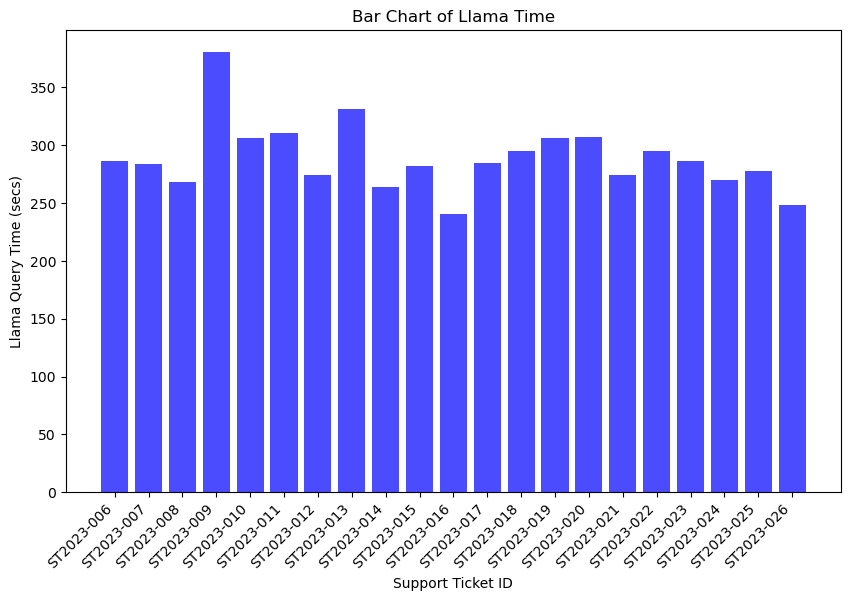

In [30]:
# Let's visualize a quick plot of query times by ticket ID
plt.figure(figsize=(10, 6))
plt.bar(llama_timings['support_tick_id'], llama_timings['llama_time'], color='blue', alpha=0.7)

# Adding labels and title
plt.title('Bar Chart of Llama Time')
plt.xlabel('Support Ticket ID')
plt.ylabel('Llama Query Time (secs)')

plt.xticks(rotation=45, ha='right') 

# Display the bar chart
plt.show()

##### I was suprised by the variability in the query times. I expected a greater difference between min and max values. These were pretty consistent, even for the tickets with incomplete text

In [31]:
# Final clean data frame with all response fields populated
data.sample(10)

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
18,ST2023-024,"My external hard drive isn't being recognized,...",Data Recovery,"[Unclassifiable, Negative]",High,ASAP,Thank you for reaching out to our support desk...
17,ST2023-023,I accidentally formatted my USB drive with cru...,Data Recovery,"[USB_Drive, File_Recovery]",Normal,24 hours,Thank you for reaching out to our support desk...
12,ST2023-018,"I accidentally spilled water on my laptop, and...",Data Recovery,"[Water Damage, Negative]",High,24-48 hours,Thank you for reaching out to our support desk...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"[Urgent, Negative]",High,ASAP,Thank you for reaching out to our support desk...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical,"[Weak Wi-Fi Signal, Negative]",Normal,24 hours,Thank you for reaching out to our support desk...
15,ST2023-021,"My internet connection is frequently dropping,...",Technical,"[Network_Issues, Unclassifiable]",Normal,24h,Thank you for reaching out to our support desk...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical,"[Battery_Issue, Negative]",Normal,24 hours,Thank you for reaching out to our support desk...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"[Gaming Laptop, Graphics Card]",Normal,24 hours,Thank you for reaching out to our support desk...
14,ST2023-020,"The touchpad on my laptop has stopped working,...",Hardware,"[Unclassifiable, Negative]",Normal,24 hours,Thank you for reaching out to our support desk...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"[Blue Screen Error, Frequent Crashes]",High,24 hours,Thank you for reaching out to our support desk...


### **Q6: Share your observations and insights from this exercise, and your recommendations for a business looking to adopt a solution such as this (5 Marks)**

#### Observations

* For this exercise, I chose to set up my own instance of Llama and integrate it with Jupyter through the python bindings. The complicating factor for me was my GPU, which is a consumer (albeit fairly capable) AMD graphics card. The AMD framework for ML - ROCm, with low level libraries for BLAS exposed through the HIP interface layer - is very immature for a Windows native environment. So - getting Llama compiled with the HIP libraries on Windows was an interesting challenge. The python bindings, as well, are under very active development and changing constantly.  So: my takeaway is that if you want to build and maintain your own private LLM infrastructure, you're going to need some extensive talent and effort - and you're likely going to need to be prepared to contribute some development cycles to the community.
* There are some significant differences in dependencies between CUDA and ROCm. Colab is a CUDA environment.
* Several of my fellow students discovered that Google was not keeping the CUDA version current in the Colab environment, and it would fail when creating an instance of llama, and the GPU would be accessed to offload processing layers. 
* For the actual exercise, I was surprised how tricky it was to get the LLM to consistently emit clean JSON. It kept wanting to reassure me in a response that it was oh so happy to be helping me, reiterate my instructions, explain what it was going to do, etc.  I had to keep playing with the prompt to convince it to stick to strict JSON, and I think the key there was to define that as part of it's role.
* I found executing in Colab more difficult than executing on my own desktop. I had to adjust and constrain parameters like the CPU cores and the n_gpu_layers to get a configuration that could execute in both Colab and locally.
* I appreciate the "low-code" framework, but I did take some shortcuts and improvise. I think I produced the output that was required, so I hope I don't lose points for taking some liberties.
* I used a general-purpose chat model. It's not great at estimating repair times.

#### Recommendations

* There are certainly commercial solutions in the market that address this already. Amelia (https://amelia.ai/solutions/it/) is one example. The earliest iterations of Amelia (as IPSoft) was mostly rules-based, with capture/replay to resolve many issues.  It's much more sophisticated now. So one option to strongly consider is to buy, rather than build.
* If you build, there are some lessons to be gleaned from these commercial solutions.  One is that a hybrid approach - one that combine simple rules with inference systems - strikes the best balance for cost/performance.
* Also: simply analyzing and responding to the ticket request is only a small part of the solution. Integrations with other business systems, and solid automation and orchestration systems is key to producing real business results.
* If you want to offload your support staff, many kinds of requests should be handled with integrated automation. It's key to recognize when you need a human involved.


Power Ahead!
---





---

